# Installing & Importing Required Libraries

#### First I install the required libraries for the project that were not already installed in my machine:

In [224]:
%pip install yfinance sklearn numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


#### Next, I import all required libraries for this project.
- The yfinance will be used to access and import historical bitcoin price data from Yahoo Finance.
- The numpy library will make it easy to work with arrays, which can be thought of as containers that will store our data
- The pandas library will be very useful while working with datasets because of its high-performance and easy-to-use data structures and data analysis tools.
- The scikit-learn library will be used to implement the intended machine learning model. For this project I'll be using a random forest regressor.


In [279]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


### Importing the data

#### I import the bitcoin historical price data from Yahoo Finance, save it under a variable called "data" and print it to get an overview of what the data looks like:

In [280]:
btc_ticker = yf.Ticker("BTC-USD")
data = btc_ticker.history(period="max")
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2023-09-07 00:00:00+00:00,25748.312500,26409.302734,25608.201172,26240.195312,11088307100,0.0,0.0
2023-09-08 00:00:00+00:00,26245.208984,26414.005859,25677.480469,25905.654297,10817356400,0.0,0.0
2023-09-09 00:00:00+00:00,25905.425781,25921.976562,25810.494141,25895.677734,5481314132,0.0,0.0


# Cleaning the Data and Preparing it for Analysis

#### For the purposes of this project, the columns "Dividends" and "Stock Splits" are of no use to me, so I delete them:

In [281]:
del data["Dividends"]
del data["Stock Splits"]
data

,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2023-09-07 00:00:00+00:00,25748.312500,26409.302734,25608.201172,26240.195312,11088307100
2023-09-08 00:00:00+00:00,26245.208984,26414.005859,25677.480469,25905.654297,10817356400
2023-09-09 00:00:00+00:00,25905.425781,25921.976562,25810.494141,25895.677734,5481314132


#### To make writing code a bit faster, I prefer working with column names all in lower case; therefore, in the next step I make all column names lower case.
<br>Note that the name of column "Date" did not change its name to lower case. That's because the column "Date" is an index column and is not affected by the code bellow. The index column is only being used to store row labels by dates. I will leave it as is.

In [282]:
data.columns = [c.lower() for c in data.columns]
data

,open,high,low,close,volume
Date,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2023-09-07 00:00:00+00:00,25748.312500,26409.302734,25608.201172,26240.195312,11088307100
2023-09-08 00:00:00+00:00,26245.208984,26414.005859,25677.480469,25905.654297,10817356400
2023-09-09 00:00:00+00:00,25905.425781,25921.976562,25810.494141,25895.677734,5481314132


#### To make the task of predicting the closing price of Bitcoin more accurate, the regression model will need more than simply historical closing prices. It will need other relevant data with some meaningful relationship to the closing price. In this case, I use information already available in the imported dataset to keep things simple. I create additional columns with information such as the difference beween yesterday's high and low prices, the difference between yersterday's opening and closing prices, yeterday's trading volume, etc. The more feature engineering columns that have a meaningfull relationship to the closing price, the better. 

In [283]:
data['high-low'] = data['high'] - data['low']
data['open-close'] = data['open'] - data['close']
data['yesterdays open'] = data['open'].shift(1)
data['yesterdays high'] = data['high'].shift(1)
data['yesterdays low'] = data['low'].shift(1)
data['yesterdays close'] = data['close'].shift(1)
data['yesterdays high-low'] = data['high-low'].shift(1)
data['yesterdays open-close'] = data['open-close'].shift(1)
data['yesterdays volume'] = data['volume'].shift(1)
data

,open,high,low,close,volume,high-low,open-close,yesterdays open,yesterdays high,yesterdays low,yesterdays close,yesterdays high-low,yesterdays open-close,yesterdays volume
Date,,,,,,,,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,15.752014,8.529999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,43.755981,32.419983,465.864014,468.174011,452.421997,457.334015,15.752014,8.529999,2.105680e+07
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,43.302979,29.307007,456.859985,456.859985,413.104004,424.440002,43.755981,32.419983,3.448320e+07
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,33.412994,-14.230988,424.102997,427.834991,384.532013,394.795990,43.302979,29.307007,3.791970e+07
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,19.244995,9.263977,394.673004,423.295990,389.882996,408.903992,33.412994,-14.230988,3.686360e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-07 00:00:00+00:00,25748.312500,26409.302734,25608.201172,26240.195312,11088307100,801.101562,-491.882812,25783.931641,25953.015625,25404.359375,25753.236328,548.656250,30.695312,1.275271e+10
2023-09-08 00:00:00+00:00,26245.208984,26414.005859,25677.480469,25905.654297,10817356400,736.525391,339.554688,25748.312500,26409.302734,25608.201172,26240.195312,801.101562,-491.882812,1.108831e+10
2023-09-09 00:00:00+00:00,25905.425781,25921.976562,25810.494141,25895.677734,5481314132,111.482422,9.748047,26245.208984,26414.005859,25677.480469,25905.654297,736.525391,339.554688,1.081736e+10


#### The first row of the dataset has now some empty cells for all columns that calculate yesterday's values for the simple fact that the row at hand is the first day for which data is available. Thus, I delete the first row of data to ensure that there are no problems down the road asa result of our first row having some empty cells.

In [284]:
data = data.dropna()
data

,open,high,low,close,volume,high-low,open-close,yesterdays open,yesterdays high,yesterdays low,yesterdays close,yesterdays high-low,yesterdays open-close,yesterdays volume
Date,,,,,,,,,,,,,,
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,43.755981,32.419983,465.864014,468.174011,452.421997,457.334015,15.752014,8.529999,2.105680e+07
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,43.302979,29.307007,456.859985,456.859985,413.104004,424.440002,43.755981,32.419983,3.448320e+07
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,33.412994,-14.230988,424.102997,427.834991,384.532013,394.795990,43.302979,29.307007,3.791970e+07
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,19.244995,9.263977,394.673004,423.295990,389.882996,408.903992,33.412994,-14.230988,3.686360e+07
2014-09-22 00:00:00+00:00,399.100006,406.915985,397.130005,402.152008,24127600,9.785980,-3.052002,408.084991,412.425995,393.181000,398.821014,19.244995,9.263977,2.658010e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-07 00:00:00+00:00,25748.312500,26409.302734,25608.201172,26240.195312,11088307100,801.101562,-491.882812,25783.931641,25953.015625,25404.359375,25753.236328,548.656250,30.695312,1.275271e+10
2023-09-08 00:00:00+00:00,26245.208984,26414.005859,25677.480469,25905.654297,10817356400,736.525391,339.554688,25748.312500,26409.302734,25608.201172,26240.195312,801.101562,-491.882812,1.108831e+10
2023-09-09 00:00:00+00:00,25905.425781,25921.976562,25810.494141,25895.677734,5481314132,111.482422,9.748047,26245.208984,26414.005859,25677.480469,25905.654297,736.525391,339.554688,1.081736e+10


# Training the prediction model. Yay

#### In the lines of code below, I do the following things:

- I define which columns will be used by the regressor as inputs columns (also known as feature engineering) to be used to make the predictions, and store those values under the variable "X". I drop the columns "close", "high", "low", "volume", "high-low", and "open-close" to prevent overfitting because in a real world scenario we will not have those values available for the day or days for which we are trying to predict the closing price. All other columns are safe to use. 
- I define which column must be predicted (our target column), and store it under the variable "y"
- And I split the dataset into a training dataset and a testing dataset. I reserve 80% of the historical data for training and the remaining 20% for the purpose of testing the model.

In [285]:
#Defining the inputs and outputs of the training model
X = data.drop(['close', 'high', 'low', 'volume', 'high-low', 'open-close'], axis = 1)
y = data['close']

#Splitting between training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, shuffle=False)



In [286]:
X_train.shape

(2624, 8)

In [287]:
X_train

,open,yesterdays open,yesterdays high,yesterdays low,yesterdays close,yesterdays high-low,yesterdays open-close,yesterdays volume
Date,,,,,,,,
2014-09-18 00:00:00+00:00,456.859985,465.864014,468.174011,452.421997,457.334015,15.752014,8.529999,2.105680e+07
2014-09-19 00:00:00+00:00,424.102997,456.859985,456.859985,413.104004,424.440002,43.755981,32.419983,3.448320e+07
2014-09-20 00:00:00+00:00,394.673004,424.102997,427.834991,384.532013,394.795990,43.302979,29.307007,3.791970e+07
2014-09-21 00:00:00+00:00,408.084991,394.673004,423.295990,389.882996,408.903992,33.412994,-14.230988,3.686360e+07
2014-09-22 00:00:00+00:00,399.100006,408.084991,412.425995,393.181000,398.821014,19.244995,9.263977,2.658010e+07
...,...,...,...,...,...,...,...,...
2021-11-19 00:00:00+00:00,56896.128906,60360.136719,60948.500000,56550.792969,56942.136719,4397.707031,3418.000000,4.138834e+10
2021-11-20 00:00:00+00:00,58115.082031,56896.128906,58351.113281,55705.179688,58119.578125,2645.933594,-1223.449219,3.870241e+10
2021-11-21 00:00:00+00:00,59730.507812,58115.082031,59859.878906,57469.726562,59697.195312,2390.152344,-1582.113281,3.062426e+10


In [288]:
y_train.shape

(2624,)

In [289]:
y_train

Date
2014-09-18 00:00:00+00:00      424.440002
2014-09-19 00:00:00+00:00      394.795990
2014-09-20 00:00:00+00:00      408.903992
2014-09-21 00:00:00+00:00      398.821014
2014-09-22 00:00:00+00:00      402.152008
                                 ...     
2021-11-19 00:00:00+00:00    58119.578125
2021-11-20 00:00:00+00:00    59697.195312
2021-11-21 00:00:00+00:00    58730.476562
2021-11-22 00:00:00+00:00    56289.289062
2021-11-23 00:00:00+00:00    57569.074219
Name: close, Length: 2624, dtype: float64

In [290]:
X_test.shape

(657, 8)

In [291]:
X_test

,open,yesterdays open,yesterdays high,yesterdays low,yesterdays close,yesterdays high-low,yesterdays open-close,yesterdays volume
Date,,,,,,,,
2021-11-24 00:00:00+00:00,57565.851562,56304.554688,57875.515625,55632.761719,57569.074219,2242.753906,-1264.519531,3.748580e+10
2021-11-25 00:00:00+00:00,57165.417969,57565.851562,57803.066406,55964.222656,56280.425781,1838.843750,1285.425781,3.663557e+10
2021-11-26 00:00:00+00:00,58960.285156,57165.417969,59367.968750,57146.683594,57274.679688,2221.285156,-109.261719,3.428402e+10
2021-11-27 00:00:00+00:00,53736.429688,58960.285156,59183.480469,53569.765625,53569.765625,5613.714844,5390.519531,4.181075e+10
2021-11-28 00:00:00+00:00,54813.023438,53736.429688,55329.257812,53668.355469,54815.078125,1660.902344,-1078.648438,3.056086e+10
...,...,...,...,...,...,...,...,...
2023-09-07 00:00:00+00:00,25748.312500,25783.931641,25953.015625,25404.359375,25753.236328,548.656250,30.695312,1.275271e+10
2023-09-08 00:00:00+00:00,26245.208984,25748.312500,26409.302734,25608.201172,26240.195312,801.101562,-491.882812,1.108831e+10
2023-09-09 00:00:00+00:00,25905.425781,26245.208984,26414.005859,25677.480469,25905.654297,736.525391,339.554688,1.081736e+10


In [292]:
y_test.shape

(657,)

In [293]:
y_test

Date
2021-11-24 00:00:00+00:00    56280.425781
2021-11-25 00:00:00+00:00    57274.679688
2021-11-26 00:00:00+00:00    53569.765625
2021-11-27 00:00:00+00:00    54815.078125
2021-11-28 00:00:00+00:00    57248.457031
                                 ...     
2023-09-07 00:00:00+00:00    26240.195312
2023-09-08 00:00:00+00:00    25905.654297
2023-09-09 00:00:00+00:00    25895.677734
2023-09-10 00:00:00+00:00    25832.226562
2023-09-11 00:00:00+00:00    25718.535156
Name: close, Length: 657, dtype: float64

#### Next, I import the Random Forest Regressor from Scikit-Learn, instantiate the model, train the model, predict the closing prices for the test dataset, and create a prediction dataframe to store those predictions:

In [294]:
# Creating a Random Forest Model
from sklearn.ensemble import RandomForestRegressor

# Instantiating the model
model = RandomForestRegressor(n_estimators=90, random_state=32, min_samples_leaf = 1)

#Fitting the data/Training the model
model.fit(X_train, y_train)

#Predict values
predicted_values = model.predict(X_test)

#Create prediction dataframe
prediction = pd.DataFrame({'y-pred':predicted_values}, index=X_test.index)
prediction

,y-pred
Date,
2021-11-24 00:00:00+00:00,57622.337934
2021-11-25 00:00:00+00:00,57808.026432
2021-11-26 00:00:00+00:00,58892.408898
2021-11-27 00:00:00+00:00,55093.903516
2021-11-28 00:00:00+00:00,54934.172830
...,...
2023-09-07 00:00:00+00:00,27159.425109
2023-09-08 00:00:00+00:00,27249.285807
2023-09-09 00:00:00+00:00,27316.246441


#### Next, I join the test dataframe (actual closing prices in test dataset) to the prediction dataframe (predicted closing prices): 

In [295]:
prediction = prediction.join(y_test)
prediction

,y-pred,close
Date,,
2021-11-24 00:00:00+00:00,57622.337934,56280.425781
2021-11-25 00:00:00+00:00,57808.026432,57274.679688
2021-11-26 00:00:00+00:00,58892.408898,53569.765625
2021-11-27 00:00:00+00:00,55093.903516,54815.078125
2021-11-28 00:00:00+00:00,54934.172830,57248.457031
...,...,...
2023-09-07 00:00:00+00:00,27159.425109,26240.195312
2023-09-08 00:00:00+00:00,27249.285807,25905.654297
2023-09-09 00:00:00+00:00,27316.246441,25895.677734


# Visualizing the data

#### For the purposes of plotting both the actual vs predicted prices during training and actual vs predicted prices during testing, I also create a dataframe for training predictions just like I did with the test predictions: 

In [296]:
#Predict Training values
predicted_values_training = model.predict(X_train)

#Create prediction dataframe
prediction_training = pd.DataFrame({'y-training-pred':predicted_values_training}, index=X_train.index)
prediction_training

,y-training-pred
Date,
2014-09-18 00:00:00+00:00,436.126233
2014-09-19 00:00:00+00:00,402.103904
2014-09-20 00:00:00+00:00,399.451484
2014-09-21 00:00:00+00:00,399.959086
2014-09-22 00:00:00+00:00,398.719038
...,...
2021-11-19 00:00:00+00:00,57866.221484
2021-11-20 00:00:00+00:00,58639.067839
2021-11-21 00:00:00+00:00,58836.655252


#### Next, I join the training dataframe (actual closing prices in training dataset) to the prediction dataframe (predicted closing prices during training): 

In [297]:
prediction_training = prediction_training.join(y_train)
prediction_training

,y-training-pred,close
Date,,
2014-09-18 00:00:00+00:00,436.126233,424.440002
2014-09-19 00:00:00+00:00,402.103904,394.795990
2014-09-20 00:00:00+00:00,399.451484,408.903992
2014-09-21 00:00:00+00:00,399.959086,398.821014
2014-09-22 00:00:00+00:00,398.719038,402.152008
...,...,...
2021-11-19 00:00:00+00:00,57866.221484,58119.578125
2021-11-20 00:00:00+00:00,58639.067839,59697.195312
2021-11-21 00:00:00+00:00,58836.655252,58730.476562


#### Next, I plot the actual price vs predicted price during training:
- Note how well the two correlate during training. This is a good sign, but should not be used as an indication of how well the model performs.

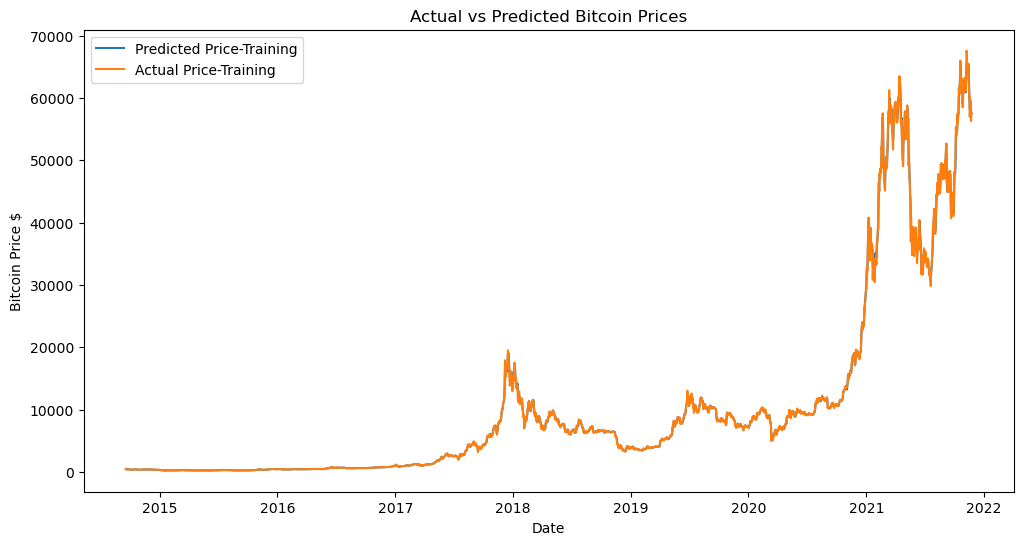

In [298]:
plt.figure(figsize=(12, 6))
plt.plot(prediction_training.index, prediction_training['y-training-pred'], label="Predicted Price-Training")
plt.plot(prediction_training.index, prediction_training['close'], label="Actual Price-Training")
plt.xlabel("Date")
plt.ylabel("Bitcoin Price $")
plt.title("Actual vs Predicted Bitcoin Prices")
plt.legend()
plt.show()

#### Next, I plot the actual price vs predicted price during test:
- Note that the actual prices and predicted prices no longer correlate as nicely during the test. That's exactly what was expected since during test we are simulating a real world scenario where limited information is available. Therefore, it is not expected that the predictions will be 100% accurate.

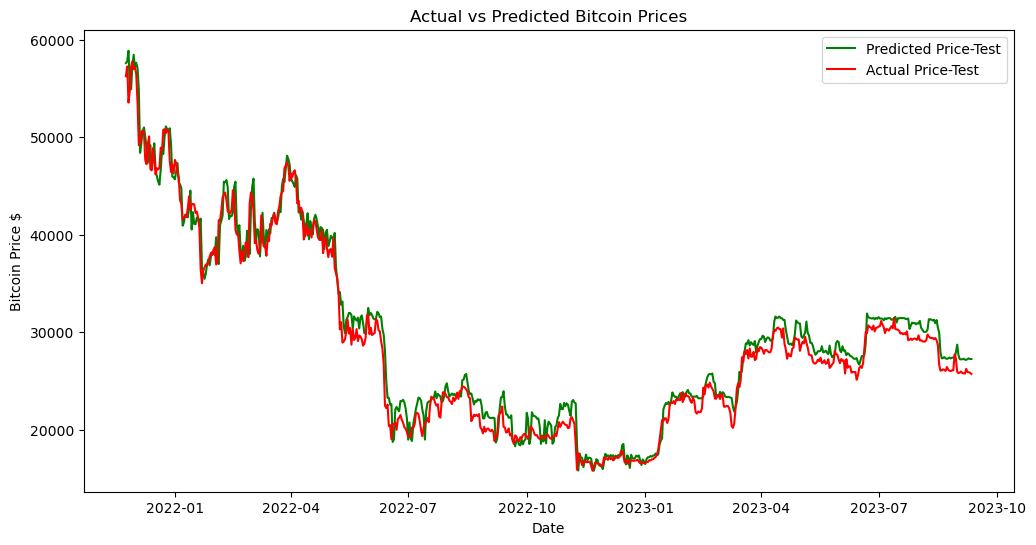

In [299]:
plt.figure(figsize=(12, 6))
plt.plot(prediction.index, prediction['y-pred'], label="Predicted Price-Test", color='green')
plt.plot(prediction.index, prediction['close'], label="Actual Price-Test", color='red')
plt.xlabel("Date")
plt.ylabel("Bitcoin Price $")
plt.title("Actual vs Predicted Bitcoin Prices")
plt.legend()
plt.show()

#### Next, I plot the actual price vs predicted price during training and the actual price vs predicted price during test, on the same plot for a more insightful visualization:

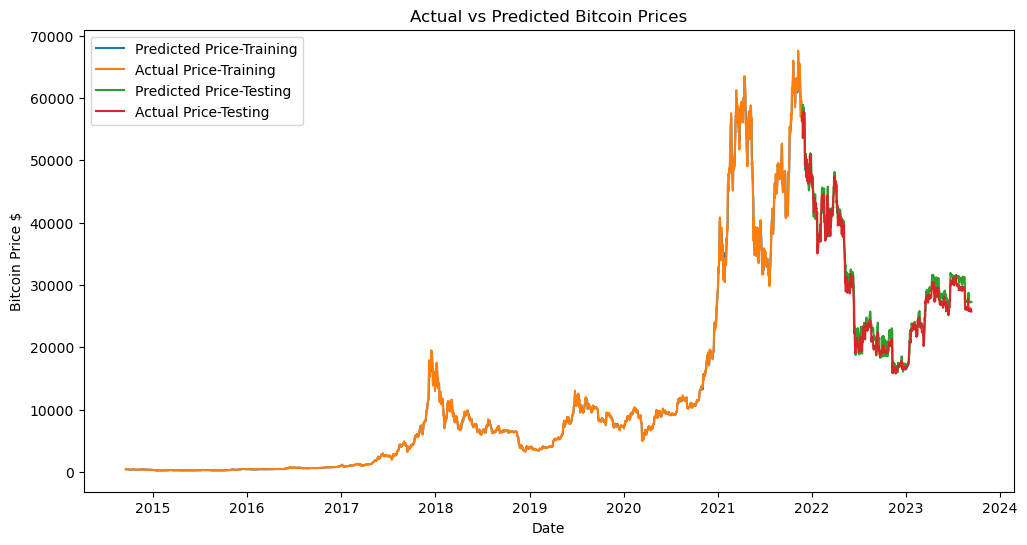

In [300]:
plt.figure(figsize=(12, 6))
plt.plot(prediction_training.index, prediction_training['y-training-pred'], label="Predicted Price-Training")
plt.plot(prediction_training.index, prediction_training['close'], label="Actual Price-Training")
plt.plot(prediction.index, prediction['y-pred'], label="Predicted Price-Testing")
plt.plot(prediction.index, prediction['close'], label="Actual Price-Testing")
plt.xlabel("Date")
plt.ylabel("Bitcoin Price $")
plt.title("Actual vs Predicted Bitcoin Prices")
plt.legend()
plt.show()

#### For a more zommed in visualization, I next plot the actual vs predicted prices for the last 31 days

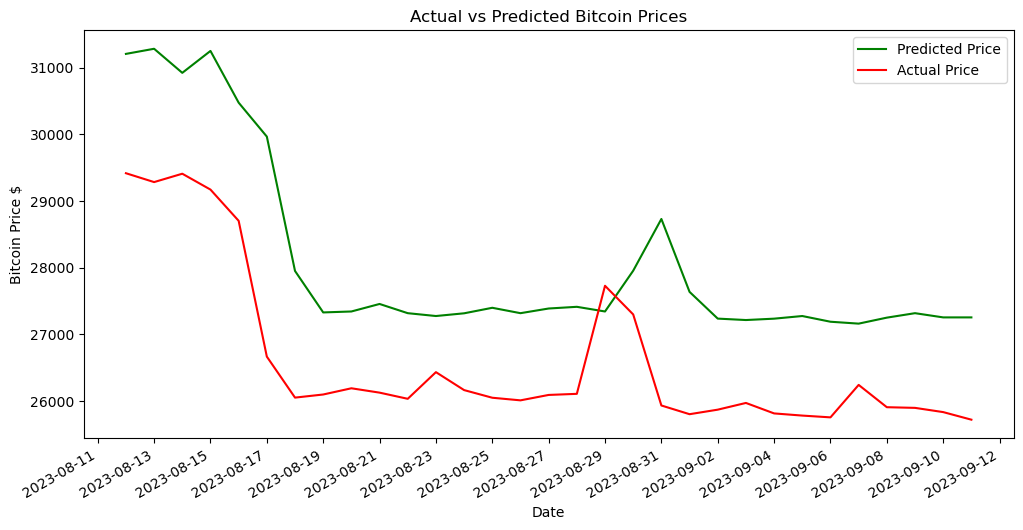

In [302]:
# filtering the prediction dataset for only data from the last 31 days  
this_months_pred = prediction['y-pred'].tail(31)
this_months_close = prediction['close'].tail(31)

# Plot observed and predicted prices over time
plt.figure(figsize=(12, 6))
plt.plot(this_months_pred.index, this_months_pred, label="Predicted Price", color='green')
plt.plot(this_months_close.index, this_months_close, label="Actual Price", color='red')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.gcf().autofmt_xdate()

plt.xlabel("Date")
plt.ylabel("Bitcoin Price $")
plt.title("Actual vs Predicted Bitcoin Prices")
plt.legend()
plt.show()

# Statistical Analysis

#### Finally, I do some statistical analysis and calculate the mean squared error, mean absolute error, root mean squared error, and the mean absolute percentage error for both the training set and the test set.

In [303]:
# Calculating the Mean Absolute Error (MAE) for the Training Set
mae = metrics.mean_absolute_error(prediction_training['close'], prediction_training['y-training-pred'])

# Calculating the Mean Squared Error (MSE) for the Training Set
mse = metrics.mean_squared_error(prediction_training['close'], prediction_training['y-training-pred'])

# Calculating the Root Mean Squared Error (RMSE) for the Training Set
rmse = np.sqrt(metrics.mean_squared_error(prediction_training['close'], prediction_training['y-training-pred']))

# Calculating the Absolute Percentage Error (MAPE) for the Training Set
mape = np.mean(np.abs(((prediction_training['close'] - prediction_training['y-training-pred'])/prediction_training['close'])))*100


print("Model Performance for Training Set")
print("------------------------------------------------------------------")
print(f"The Mean Absolute Error during Training is: {mae}")
print(f"The Mean Squared Error during Training is: {mse}")
print(f"The Root Mean Squared Error during Training is: {rmse}")
print(f"Mean Absolute Percentage Error during Training is: {mape}")

Model Performance for Training Set
------------------------------------------------------------------
The Mean Absolute Error during Training is: 130.29272499362307
The Mean Squared Error during Training is: 100220.5947216758
The Root Mean Squared Error during Training is: 316.57636475529216
Mean Absolute Percentage Error during Training is: 1.1134538154475109


In [304]:
# Calculating the Mean Absolute Error (MAE) for the Test Set
mae2 = metrics.mean_absolute_error(prediction['close'], prediction['y-pred'])

# Calculating the Mean Squared Error (MSE) for the Test Set
mse2 = metrics.mean_squared_error(prediction['close'], prediction['y-pred'])

# Calculating the Root Mean Squared Error (RMSE) for the Test Set
rmse2 = np.sqrt(metrics.mean_squared_error(prediction['close'], prediction['y-pred']))

# Calculating the Absolute Percentage Error (MAPE) for the Test Set
mape2 = np.mean(np.abs(((prediction['close'] - prediction['y-pred'])/prediction['close'])))*100


print("Model Performance for Test Set")
print("------------------------------------------------------------------")
print(f"The Mean Absolute Error during Test is: {mae2}")
print(f"The Mean Squared Error during Test is: {mse2}")
print(f"The Root Mean Squared Error during Test is: {rmse2}")
print(f"Mean Absolute Percentage Error during Test is: {mape2}")

Model Performance for Test Set
------------------------------------------------------------------
The Mean Absolute Error during Test is: 1179.01510890662
The Mean Squared Error during Test is: 2142732.723251808
The Root Mean Squared Error during Test is: 1463.8076114202331
Mean Absolute Percentage Error during Test is: 4.38303631538969
